## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset, getting all of study_results & matching mouse_metadata
merge_mice = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
merge_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
#  Checking the number of mice.
sample = merge_mice["Mouse ID"].nunique()
print(f'There are {sample} mice in the sample test')

There are 249 mice in the sample test


In [4]:
# 1) Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint???
#  - All Mice ID rows where Mouse ID and Timepoint are duplicates or other rows.
# 2) Optional: Get all the data for the duplicate mouse ID. ****  COME BACK TO THIS IF TIME ALLOWS ****
duplicates = merge_mice[merge_mice.duplicated(['Mouse ID', 'Timepoint'])]
duplicates.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = merge_mice[merge_mice['Mouse ID']== 'g989'].index
merge_mice.drop(clean_mice, inplace = True)
merge_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_sample = merge_mice['Mouse ID'].nunique()
clean_sample
print(f'There are {clean_sample} mice in the clean sample.')

There are 248 mice in the clean sample.


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Mouse ID
regimen_group = merge_mice.groupby('Drug Regimen')

# # Generate various statistics for the tumor volume
tumor_mean = regimen_group[["Tumor Volume (mm3)"]].mean()
tumor_median = regimen_group[["Tumor Volume (mm3)"]].median()
tumor_variance = regimen_group[["Tumor Volume (mm3)"]].var()
tumor_std = regimen_group[["Tumor Volume (mm3)"]].std()
tumor_sem = regimen_group[["Tumor Volume (mm3)"]].sem()

# Make a summary df with all statistics for tumor volume.
summary_list = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_std, tumor_sem], axis=1)

# Rename the columns to reflect the correct statistical form.
summary_list.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Varience', 'Std Dev Tumor Vol', 'Tumor Vol Std Err']
summary_list



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Std Dev Tumor Vol,Tumor Vol Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
merge_mice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : [np.mean, np.median, np.var, np.std, st.sem]}) 


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen'>

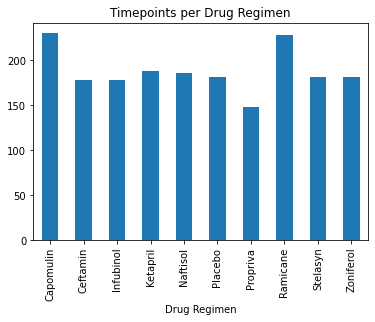

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.

# Count number of timepoints per regimen
count_timepoints = regimen_group['Timepoint'].count()
count_timepoints
count_timepoints.plot(kind='bar' , x='Drug Regimen', title='Timepoints per Drug Regimen')


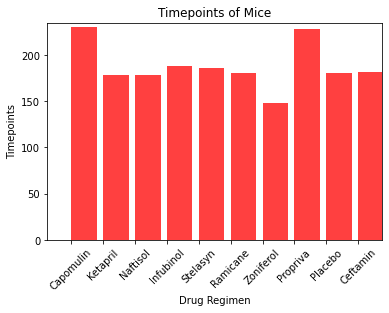

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pyplot.

# Group by Drug Regimen
regimen_group = merge_mice.groupby('Drug Regimen')

# # # Data for plotting
regimen_list = merge_mice['Drug Regimen'].unique()
regimen_list2 = regimen_list.tolist()
timepoints_list = count_timepoints.tolist()

# Set tick locations for bar chart
x_axis = np.arange(0, len(regimen_list2))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
    
plt.title('Timepoints of Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

plt.xlim(-0.75, len(regimen_list2)-.25)
plt.ylim(0, max(timepoints_list) + 5)

plt.bar(x_axis, timepoints_list, facecolor="red", alpha=0.75, align="edge")
plt.xticks(tick_locations, regimen_list2)
plt.xticks(rotation = 45)
plt.show()  
    

C:\Users\J\anaconda3\envs\PythonData38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


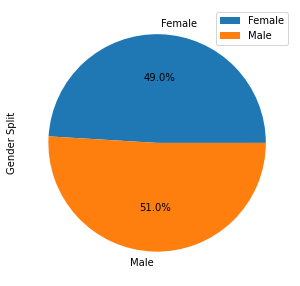

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get subset of data for graphing
by_sex = merge_mice.groupby("Sex")
by_sex_count = by_sex.count()
pie_data = by_sex_count[['Mouse ID']]
pie_data
pie_data.rename(columns = {'Mouse ID' : "Gender Split"}, inplace = True)


# Make Pie Chart
plot = pie_data.plot.pie(y='Gender Split', figsize=(5, 5), autopct="%1.1f%%")

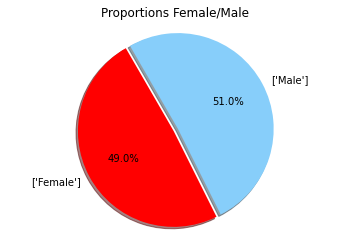

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using PyPlot

# Count how many of each sex
sexes_group = merge_mice.groupby('Sex')
gender_count = sexes_group["Sex"].count()

# Get a list of genders
genders = sexes_group['Sex'].unique()

# Create Pie Chart - autopct="%1.1f%%" -  Automatically finds the percentages of each part of the pie chart
explode = (0, 0.05)
colors = ["red", "lightskyblue"]
plt.title("Proportions Female/Male")
plt.pie(gender_count, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
merge_mice.groupby(["Timepoint"])
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = merge_mice.loc[merge_mice['Drug Regimen'].isin(drug)]
timepoint_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID'])[['Timepoint', 'Tumor Volume (mm3)']].agg('max').reset_index()
timepoint_tumor

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,45.651331
1,Capomulin,b742,45,45.000000
2,Capomulin,f966,20,45.000000
3,Capomulin,g288,45,46.304003
4,Capomulin,g316,45,46.809225
...,...,...,...,...
95,Ramicane,s508,45,45.000000
96,Ramicane,u196,45,47.622816
97,Ramicane,w678,5,45.000000
98,Ramicane,y449,15,46.378092


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# timepoint_tumor_list = timepoint_tumor.values.tolist()
# mouse_id = timepoint_tumor['Mouse ID']
# timepoints_data = timepoint_tumor['Timepoint']
# tumor_vol_data = timepoint_tumor['Tumor Volume (mm3)']
# drug_reg = timepoint_tumor['Drug Regimen']
drug_tumor = timepoint_tumor[['Drug Regimen', 'Tumor Volume (mm3)']]                 
# drug_tumor_list = drug_tumor.values.tolist()


drug_tumor.sort_values('Drug Regimen', ascending = True)
capomulin = drug_tumor[drug_tumor['Drug Regimen'].str.match('Capomulin')]
ramicane = drug_tumor[drug_tumor['Drug Regimen'].str.match('Ramicane')]
infubinol = drug_tumor[drug_tumor['Drug Regimen'].str.match('Infubinol')]
ceftamin = drug_tumor[drug_tumor['Drug Regimen'].str.match('Ceftamin')]


capomulin_tumors = capomulin['Tumor Volume (mm3)']
ramicane_tumors = ramicane['Tumor Volume (mm3)']
infubinol_tumors = infubinol['Tumor Volume (mm3)']
ceftamin_tumors = ceftamin ['Tumor Volume (mm3)']



In [15]:
#  CAPOMULIN
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# capomulin.sort_values('Tumor Volume (mm3)', ascending=True)   (DIS)CONFIRMING OUTLIERS

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 46.74900552
The interquartile range of tumor volume is: 1.7490055199999972
The the median of tumor volume is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [16]:
# RAMICAM
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# ramicane.sort_values('Tumor Volume (mm3)', ascending=True)  (DIS)CONFIRMING OUTLIERS

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 46.34383237
The interquartile range of tumor volume is: 1.3438323700000012
The the median of tumor volume is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [17]:
# INFUBINOL
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# infubinol.sort_values('Tumor Volume (mm3)', ascending=True)   (DIS)CONFIRMING OUTLIERS

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [18]:
# CEFTAMIN
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# infubinol.sort_values('Tumor Volume (mm3)', ascending=True)     (DIS)CONFIRMING OUTLIERS

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Cerfamin')]

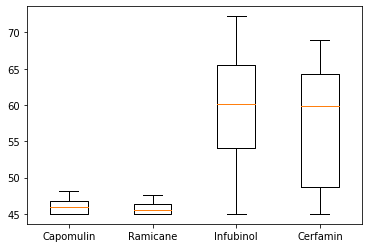

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
my_dict = {'Capomulin': capomulin_tumors, 'Ramicane': ramicane_tumors, 
           'Infubinol': infubinol_tumors, 'Cerfamin': ceftamin_tumors}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

###### Outliers Analysis
Based on the IQR analysis (confirmed by sorting and observing each data set) and according to the boxplot graph
there are no outliers in the data for any four of the drug regimens.

## Line and Scatter Plots

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_tumor = merge_mice.iloc[:, 0:3]
time_tumor2 = time_tumor[time_tumor['Mouse ID'] == 'p438']
time_tumor2


,Mouse ID,Timepoint,Tumor Volume (mm3)
218,p438,0,45.000000
355,p438,5,46.827934
571,p438,10,50.517498
814,p438,15,52.198368
1002,p438,20,52.905299
1132,p438,25,54.510575
1420,p438,30,56.406422
1574,p438,35,57.538555
1694,p438,40,59.305288
1890,p438,45,61.433892


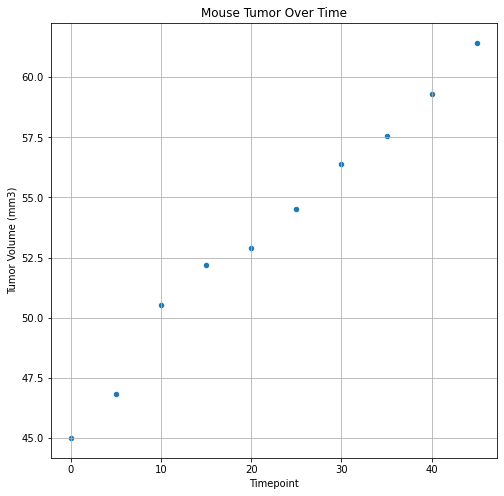

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
time_tumor2.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Mouse Tumor Over Time")
plt.show()


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
